In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

# Import Data

In [84]:
# Read whatever csv from WRDS here
rawdata_df = pd.read_csv('../data/3dce8551ace67a48_csv.zip', nrows = 1000000, low_memory = False)
rawdata_df.head()

,DATE,TIME_M,EX,SYM_ROOT,SYM_SUFFIX,PRICE
0,20190920,9:30:00.025559149,Q,GOOG,NaN,1234.75
1,20190920,9:30:00.271118326,Q,GOOG,NaN,1234.01
2,20190920,9:30:00.271126947,K,GOOG,NaN,1233.12
3,20190920,9:30:00.271166170,Q,GOOG,NaN,1234.01
4,20190920,9:30:00.271169340,Q,GOOG,NaN,1234.00


# Process Data

In [85]:
data_df = rawdata_df.query('EX != ["A", "M", "L", "D", "C"]').copy()

In [86]:
# Add datetime info
data_df['DATE TIME'] = data_df['DATE'].astype(str) + ' ' + data_df['TIME_M'].astype(str)
data_df['datetime'] = pd.to_datetime(data_df['DATE TIME'])
data_df['date'] = pd.to_datetime(data_df['DATE'].astype(str))

In [87]:
# Rename variables
data_df['ticker'] = data_df['SYM_ROOT']
data_df['log_price'] = np.log(data_df['PRICE'])

In [88]:
# Resample 
delta_n_range = np.arange(1,600,6)
rv_list = []

for i in tqdm(range(len(delta_n_range))):
    
    resample_s = delta_n_range[i]
    
    data_resample_df = (
        data_df.query('DATE == 20190923')
        .set_index("datetime")
        .groupby(["ticker", "date"])
        .resample(f'{resample_s}s', label = 'right')["log_price"]
        .last()
        .reset_index()
    )


    data_resample_df["log_price"] = (
        data_resample_df.sort_values(by="datetime")
        .groupby(["ticker", "date"])["log_price"]
        .fillna(method="ffill")
    )
    
    data_resample_df['return'] = data_resample_df['log_price'].diff(1)
    data_resample_df['return_sq'] = np.square(data_resample_df['return'])
    rv_list.append(data_resample_df.groupby(['date'])['return_sq'].sum().iloc[0])

In [89]:
data_df['DATE'].unique()

array([20190920, 20190923, 20190924, 20190925, 20190926, 20190927,
       20190930, 20191001, 20191002, 20191003, 20191004, 20191007,
       20191008])

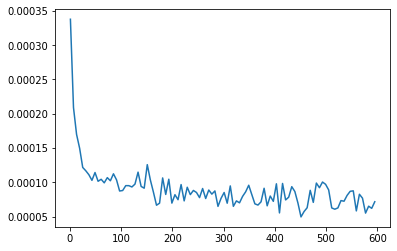

In [90]:
plt.plot(delta_n_range, rv_list)

# Treasury Bond Etfs

In [128]:
# Read whatever csv from WRDS here
data_df = pd.read_csv('../data/bond_etfs_clean_ticker_5s.csv')
data_df.head()

,ticker,ticker_desc,ticker_desc_short,date,datetime,price,log_price,return,return_5s,return_60s,rv_sub,two_scale_realized_var,sigma_2_hat,two_scale_realized_var_biased,two_scale_realized_vol,two_scale_realized_vol_100
0,IEF,iShares 7-10 Year Treasury Bond ETF,7-10 Year,2020-01-03,2020-01-03 09:30:00,111.15,4.710881,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IEF,iShares 7-10 Year Treasury Bond ETF,7-10 Year,2020-01-03,2020-01-03 09:30:05,111.16,4.710971,0.00009,0.00009,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IEF,iShares 7-10 Year Treasury Bond ETF,7-10 Year,2020-01-03,2020-01-03 09:30:10,111.16,4.710971,0.00000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IEF,iShares 7-10 Year Treasury Bond ETF,7-10 Year,2020-01-03,2020-01-03 09:30:15,111.15,4.710881,-0.00009,-0.00009,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IEF,iShares 7-10 Year Treasury Bond ETF,7-10 Year,2020-01-03,2020-01-03 09:30:20,111.15,4.710881,0.00000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
data_df['datetime'] = pd.to_datetime(data_df['datetime'])

In [133]:
data_df['ticker'].unique()

array(['IEF', 'IEI', 'SHY', 'TLH', 'TLT'], dtype=object)

In [134]:

# Resample 
delta_n_range = list(range(1,600,3))
rv_list = []

for i in tqdm(range(len(delta_n_range))):
    
    resample_s = delta_n_range[i]
    
    data_resample_df = (
        data_df.query('ticker == "TLH"')
        .set_index("datetime")
        .groupby(["ticker", "date"])
        .resample(f'{resample_s}s', label = 'right')["log_price"]
        .last()
        .reset_index()
    )


    data_resample_df["log_price"] = (
        data_resample_df.sort_values(by="datetime")
        .groupby(["ticker", "date"])["log_price"]
        .fillna(method="ffill")
    )
    
    data_resample_df['return'] = data_resample_df['log_price'].diff(1)
    data_resample_df['return_sq'] = np.square(data_resample_df['return'])
    rv_list.append(data_resample_df.groupby(['date'])['return_sq'].sum().mean())

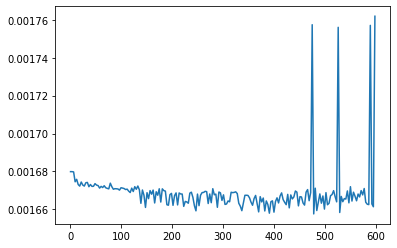

In [135]:
plt.plot(delta_n_range, rv_list)

# Corporate Bond ETFs

In [153]:
data_df = pd.read_csv('../../presentation_2/data/clean/prices.csv', nrows = 10000000)

In [159]:
data_df.head()

,ticker,date,datetime,price,log_price,return,return_squared
0,ANGL,2020-04-01 00:00:00,2020-04-01 09:28:05,25.2,3.226844,NaN,NaN
1,ANGL,2020-04-01 00:00:00,2020-04-01 09:28:10,25.2,3.226844,0.0,0.0
2,ANGL,2020-04-01 00:00:00,2020-04-01 09:28:15,25.2,3.226844,0.0,0.0
3,ANGL,2020-04-01 00:00:00,2020-04-01 09:28:20,25.2,3.226844,0.0,0.0
4,ANGL,2020-04-01 00:00:00,2020-04-01 09:28:25,25.2,3.226844,0.0,0.0


In [154]:
data_df['ticker'].unique()

array(['ANGL', 'HYG', 'HYLB', 'IGIB', 'IGSB', 'JNK', 'LQD', 'SHYG',
       'SJNK', 'SLQD', 'SPIB', 'SPSB', 'USHY', 'USIG'], dtype=object)

In [160]:
plt.figure(figsize = (15,3))
data_df['datetime'] = pd.to_datetime(data_df['datetime'])

In [176]:
data_df.query('ticker == "ANGL"').head(10000)['date']

0       2020-04-01 00:00:00
1       2020-04-01 00:00:00
2       2020-04-01 00:00:00
3       2020-04-01 00:00:00
4       2020-04-01 00:00:00
               ...         
9995    2020-04-03 00:00:00
9996    2020-04-03 00:00:00
9997    2020-04-03 00:00:00
9998    2020-04-03 00:00:00
9999    2020-04-03 00:00:00
Name: date, Length: 10000, dtype: object

In [181]:

# Resample 
delta_n_range = list(range(1,6000,100))
rv_list = []

for i in tqdm(range(len(delta_n_range))):
    
    resample_s = delta_n_range[i]
    
    data_resample_df = (
        data_df.query('ticker == "ANGL"').head(3000)
        .set_index("datetime")
        .groupby(["ticker", "date"])
        .resample(f'{resample_s}s', label = 'right')["log_price"]
        .last()
        .reset_index()
    )


    data_resample_df["log_price"] = (
        data_resample_df.sort_values(by="datetime")
        .groupby(["ticker", "date"])["log_price"]
        .fillna(method="ffill")
    )
    
    data_resample_df['return'] = data_resample_df['log_price'].diff(1)
    data_resample_df['return_sq'] = np.square(data_resample_df['return'])
    rv_list.append(data_resample_df.groupby(['date'])['return_sq'].sum().mean())

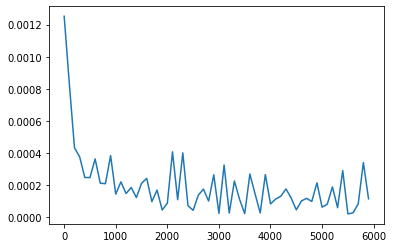

In [189]:
plt.plot(delta_n_range, rv_list)

In [191]:
data_resample_df = (
    data_df
    .set_index("datetime")
    .groupby(["ticker", "date"])
    .resample("5min", label="right")["log_price"]
    .last()
    .reset_index()
)


data_resample_df["log_price"] = (
    data_resample_df.sort_values(by="datetime")
    .groupby(["ticker", "date"])["log_price"]
    .fillna(method="ffill")
)

data_resample_df["return"] = data_resample_df["log_price"].diff(1)
data_resample_df["return_sq"] = np.square(data_resample_df["return"])

In [231]:
data_resample_df.to_csv('../data/corporate_bond_etfs_5m_prices.csv')

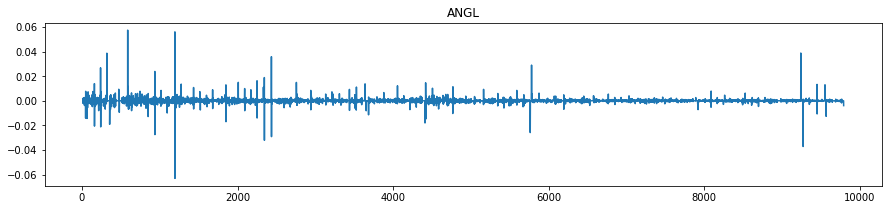

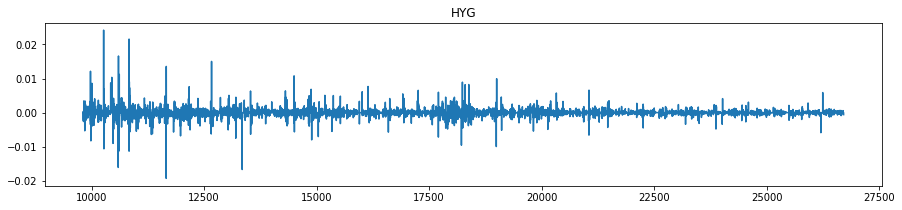

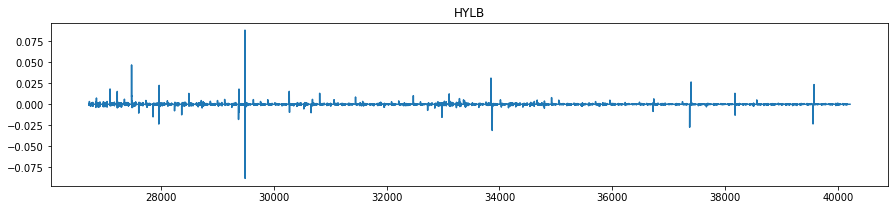

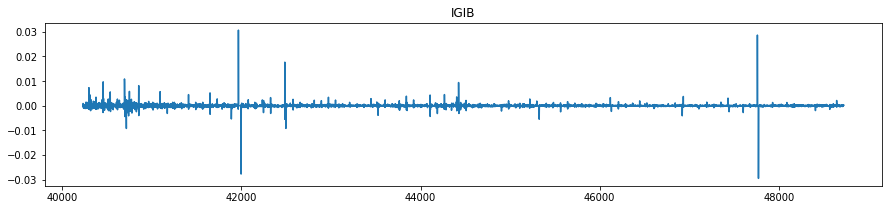

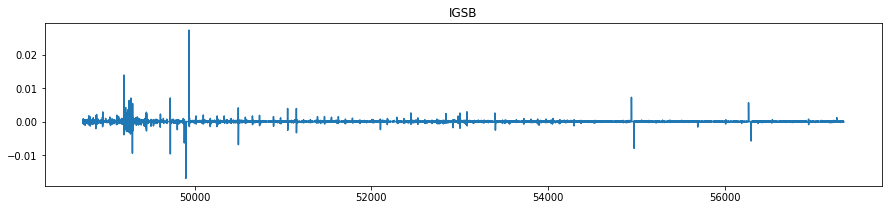

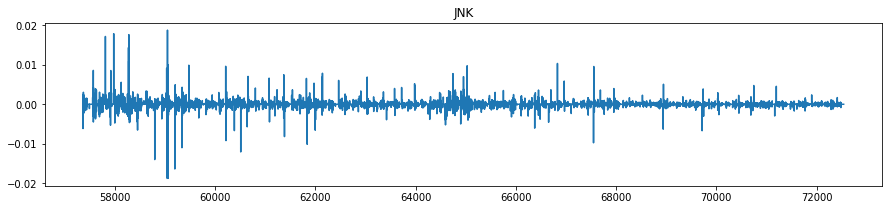

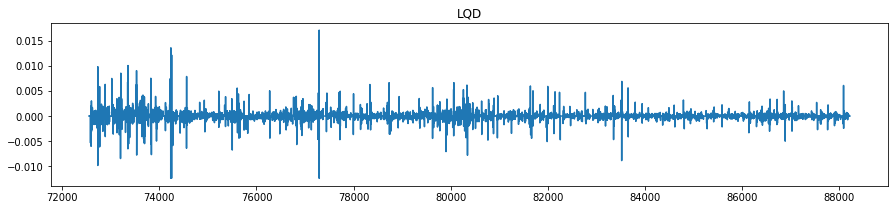

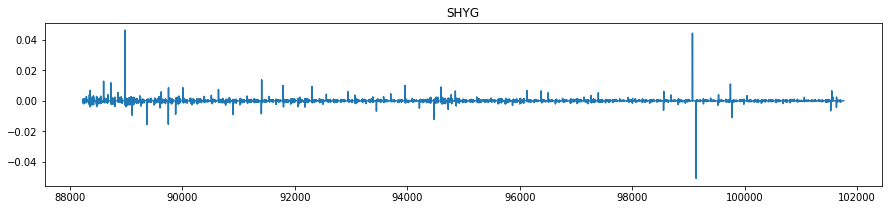

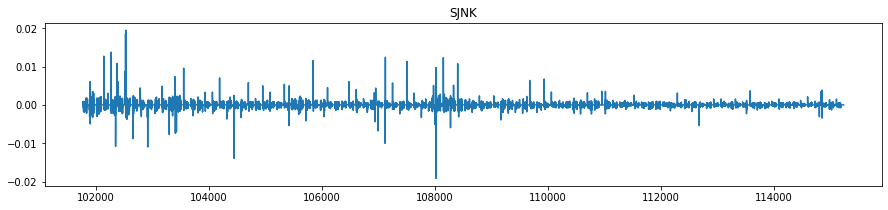

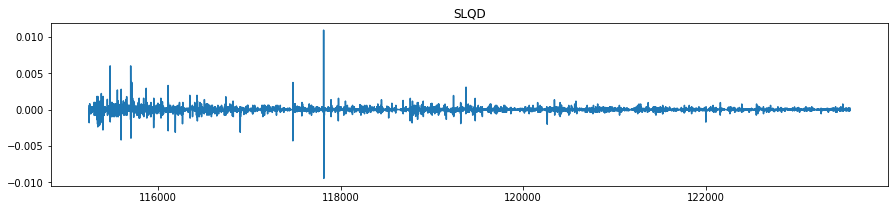

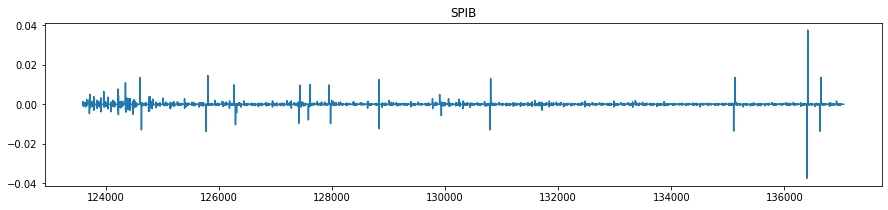

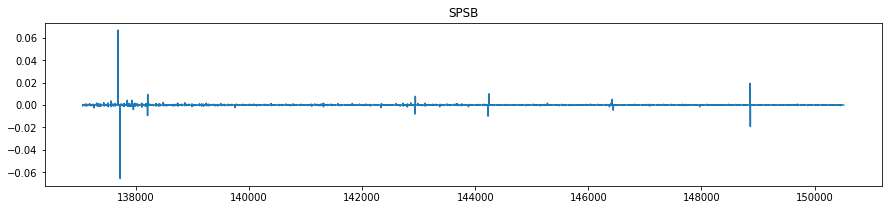

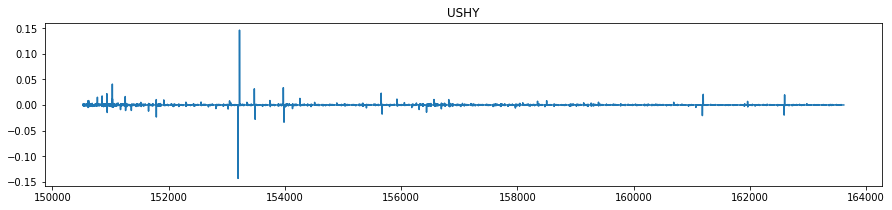

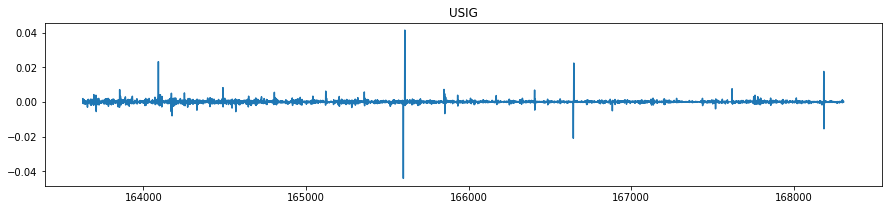

In [201]:
for ticker in data_resample_df['ticker'].unique():
    fig, ax =plt.subplots(figsize = (15,3), nrows = 1)
    data_resample_df.query('ticker == @ticker')['return'].iloc[10:].plot(ax = ax)
    plt.title(ticker)

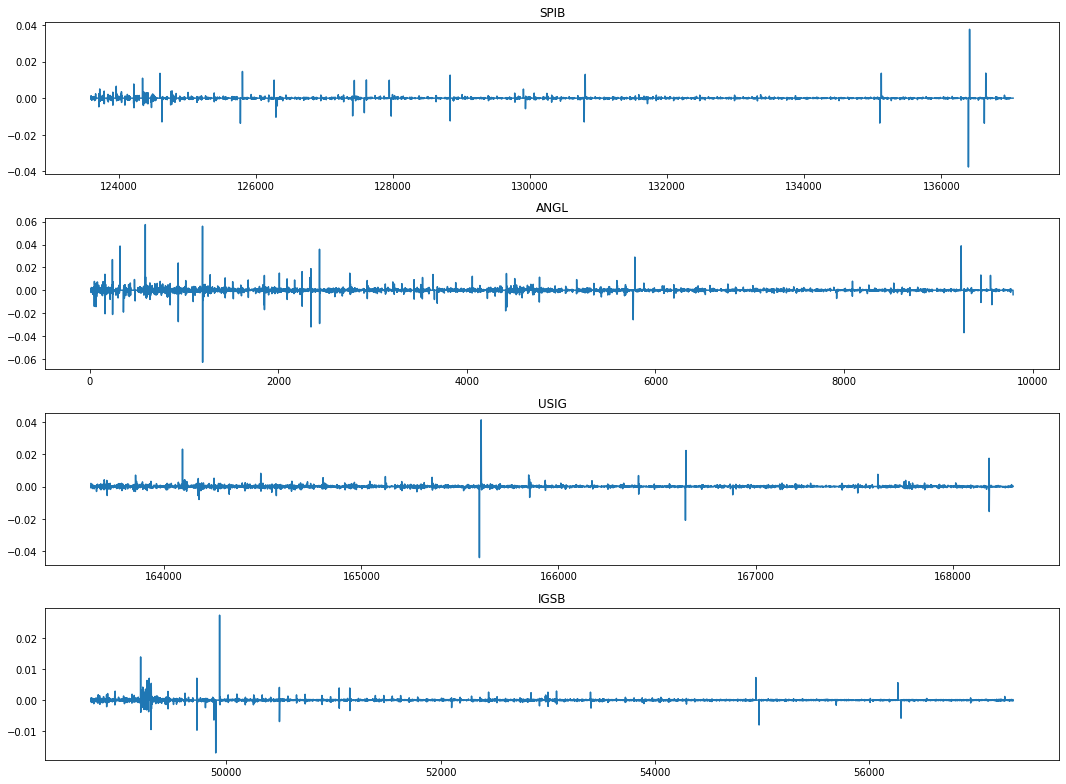

In [205]:
fig, ax =plt.subplots(figsize = (15,11), nrows = 4)

ax = plt.subplot(411)
data_resample_df.query('ticker == "SPIB"')['return'].iloc[10:].plot(ax = ax)
plt.title('SPIB')

ax = plt.subplot(412)
data_resample_df.query('ticker == "ANGL"')['return'].iloc[10:].plot(ax = ax)
plt.title('ANGL')

ax = plt.subplot(413)
data_resample_df.query('ticker == "USIG"')['return'].iloc[10:].plot(ax = ax)
plt.title('USIG')

ax = plt.subplot(414)
data_resample_df.query('ticker == "IGSB"')['return'].iloc[10:].plot(ax = ax)
plt.title('IGSB')

plt.tight_layout()


In [217]:
np.abs(data_temp['return']).describe(percentiles = [0.01, 0.999])

count    4689.000000
mean        0.000531
std         0.004893
min         0.000000
1%          0.000000
50%         0.000189
99.9%       0.021413
max         0.324297
Name: return, dtype: float64

In [229]:
for ticker in data_resample_df["ticker"].unique():
    data_temp = data_resample_df.query("ticker == @ticker").copy()
    print(ticker + " Jumps: ", end="")
    print(
        len(
            data_temp.loc[
                np.abs(data_temp["return"])
                > 5
                * data_temp.loc[
                    np.abs(data_temp["return"]) < np.abs(data_temp["return"]).quantile(0.99), "return"
                ].std(),
                :,
            ]
        )
    )

ANGL Jumps: 145
HYG Jumps: 251
HYLB Jumps: 163
IGIB Jumps: 120
IGSB Jumps: 137
JNK Jumps: 211
LQD Jumps: 267
SHYG Jumps: 164
SJNK Jumps: 149
SLQD Jumps: 103
SPIB Jumps: 258
SPSB Jumps: 137
USHY Jumps: 171
USIG Jumps: 51


In [251]:
%%time
data_df = pd.read_csv('../data/ticker_5s.csv')

CPU times: user 7.33 s, sys: 2.61 s, total: 9.94 s
Wall time: 14.4 s


In [247]:
data_df.to_feather('../data/ticker_5s.feather')

In [3]:
%%time
data_df = pd.read_feather('../data/ticker_5s.feather')

CPU times: user 1.61 s, sys: 2.25 s, total: 3.86 s
Wall time: 3.11 s


In [250]:
data_df['ticker'].unique()

array(['ANGL', 'IGSB', 'SPIB', 'USIG'], dtype=object)

In [242]:
pd.Series(pd.to_datetime(data_df['date'].unique())).sort_

0     2019-09-20
1     2019-09-23
2     2019-09-24
3     2019-09-25
4     2019-09-26
         ...    
247   2020-09-14
248   2020-09-15
249   2020-09-16
250   2020-09-17
251   2020-09-18
Length: 252, dtype: datetime64[ns]